In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import glob, re
from sklearn.model_selection import train_test_split 

In [2]:
classes = []
samples = {}

for dataset in glob.glob("dataset/*.npy"):
    class_name = re.search('.*?full_numpy_bitmap_(.*).npy', dataset)
    if class_name:
        name = class_name.group(1)
        samples[name] = np.load(dataset)[:50000]
        classes.append(name)
        print(name, len(samples[name]))

cake 50000
car 50000
broccoli 50000
apple 50000
bird 50000
book 50000
cat 50000
bat 50000


In [3]:
NUM_CLASSES = len(classes)

x_data = []
y_data = []

for i, name in enumerate(classes):
    x_data.append(samples[name] / 255.0)
    y = np.zeros((samples[name].shape[0], NUM_CLASSES))
    y[:,i] = 1
    y_data.append(y)

np_x_data = np.concatenate(x_data)
np_y_data = np.concatenate(y_data)

shaped_x_data = np_x_data.reshape(-1, 28, 28, 1)

print(shaped_x_data.shape, np_y_data.shape)

x_train, x_test_full, y_train, y_test_full = train_test_split(shaped_x_data, np_y_data, test_size=0.4)
x_test, x_val, y_test, y_val = train_test_split(x_test_full, y_test_full, test_size=0.25)

(400000, 28, 28, 1) (400000, 8)


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(NUM_CLASSES, activation="softmax"))
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [8]:
model.load_weights("models/classifier.h5")

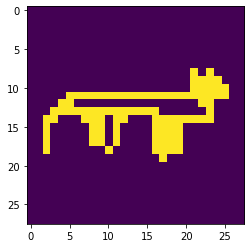

In [25]:
NUM = 16
target = x_test[NUM].copy()
target[target < 0.8] = 0
target[target >= 0.8] = 1
plt.imshow(target.reshape(28,28))

<BarContainer object of 8 artists>

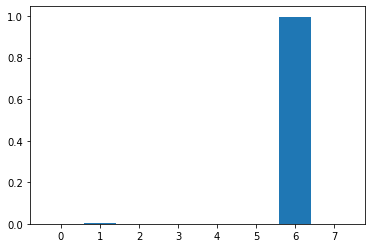

In [26]:
out = model.predict(target.reshape(1, 28, 28, 1)).reshape(8)
plt.bar(np.arange(0, NUM_CLASSES), out)